# Swiggy Analysis

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib as mt 
from matplotlib import pyplot as plt 

In [6]:
f=pd.read_csv("dataset/swiggy.csv")
f.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [18]:
f.shape

(8680, 10)

In [7]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [8]:
f.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [9]:
f.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [10]:
f.groupby('City')['City'].agg('count')

City
Ahmedabad     717
Bangalore     946
Chennai      1106
Delhi         611
Hyderabad    1075
Kolkata      1346
Mumbai       1277
Pune         1090
Surat         512
Name: City, dtype: int64

In [32]:
f.groupby('Price')['Price'].agg('count')

Price
0.0       5
1.0       4
2.0       2
5.0       1
10.0      2
         ..
1700.0    1
1800.0    3
1900.0    3
2000.0    4
2500.0    3
Name: Price, Length: 120, dtype: int64

In [162]:
f.groupby('Avg ratings')['Avg ratings'].agg('count')

Avg ratings
2.0       1
2.2       3
2.3       1
2.4       1
2.5       1
2.6       2
2.7      11
2.8      15
2.9    3279
3.0      25
3.1      26
3.2      45
3.3      51
3.4      60
3.5      95
3.6     118
3.7     207
3.8     313
3.9     421
4.0     524
4.1     700
4.2     754
4.3     792
4.4     573
4.5     338
4.6     166
4.7      96
4.8      29
4.9      15
5.0      18
Name: Avg ratings, dtype: int64

In [71]:
f.groupby('Food type')['Food type'].agg('count')[0:20]

Food type
Afghani,Arabian,Indian,Tandoor                                          1
Afghani,Biryani                                                         1
Afghani,Mughlai                                                         1
American                                                               14
American  Beverages  Fast Food                                          1
American  Chinese  Continental  Desserts                                1
American  Chinese  Indian                                               1
American  Continental                                                   1
American  Continental  Italian  Pastas  Snacks  Desserts  Beverages     1
American  European  Continental                                         1
American  Fast Food                                                     3
American  Fast Food  Beverages                                          1
American  Fast Food  Italian  Mexican  Beverages                        1
American  Mexican  Indian  F

In [11]:
%matplotlib inline

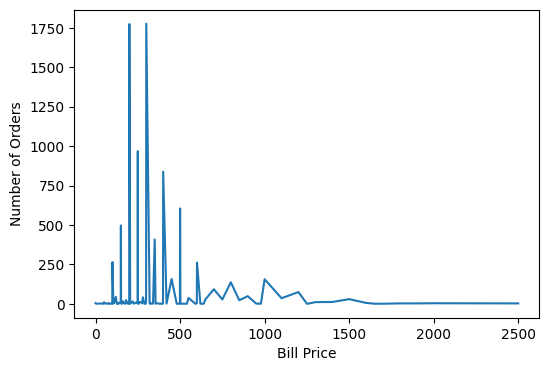

In [62]:
x=f.groupby('Price')['Price'].agg('count')
plt.figure(figsize=[6,4])
plt.plot(x)
plt.xlabel('Bill Price')
plt.ylabel('Number of Orders');

''

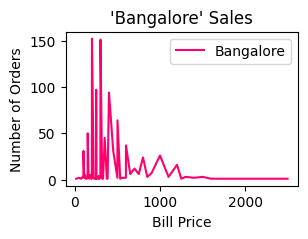

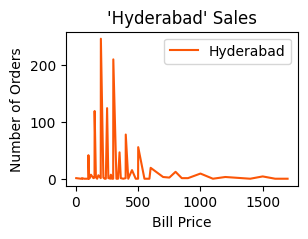

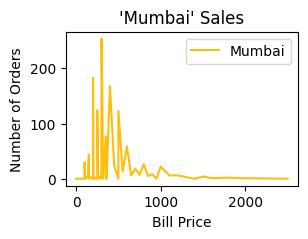

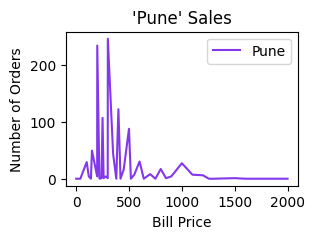

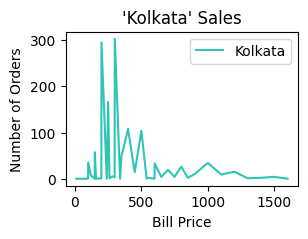

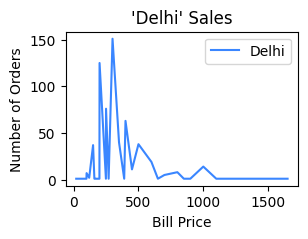

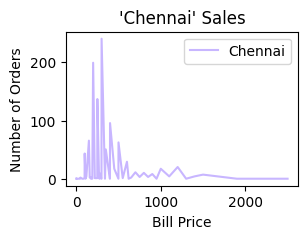

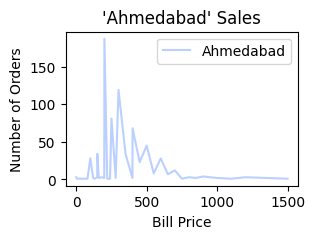

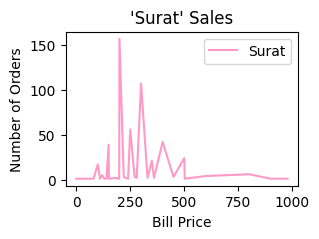

In [128]:
def CitySales(city,colors):
    x=f[f['City']==city].groupby('Price')['Price'].agg('count')
    plt.figure(figsize=[3,2])
    plt.plot(x,color=colors,)
    plt.xlabel('Bill Price')
    plt.ylabel('Number of Orders')
    plt.title("'{}' Sales".format(city))
    plt.legend([city])

cityname=f['City'].unique()
colors=['#ff006e','#fb5607','#ffbe0b','#8338ec','#2ec4b6','#3a86ff','#c8b6ff','#bbd0ff','#ff99c8','#4cc9f0','#d0f4de']
for i,j in zip(cityname,colors):
    CitySales(i,j)
;

''

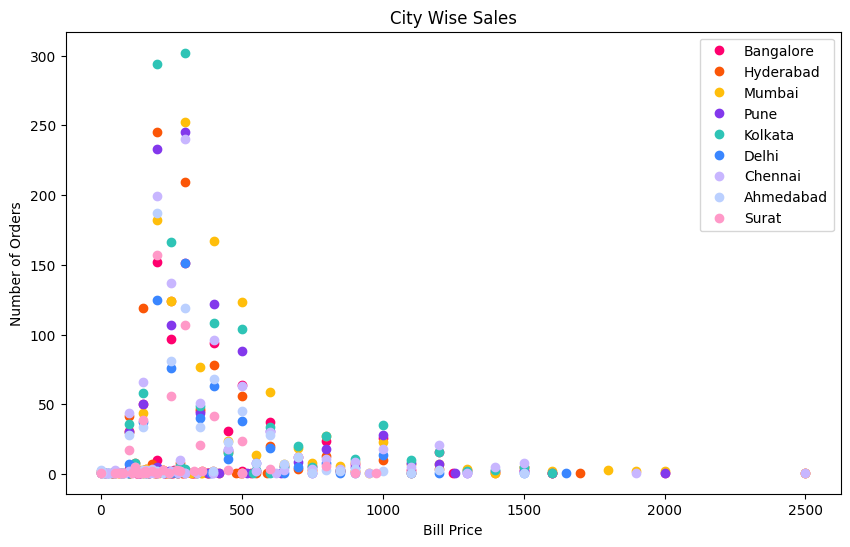

In [160]:
cityname=f['City'].unique()
def CitySales(city,colors):
    x=f[f['City']==city].groupby('Price')['Price'].agg('count')
    plt.plot(x,'o',color=colors)
    plt.xlabel('Bill Price')
    plt.ylabel('Number of Orders')
    plt.title('City Wise Sales')
    plt.legend(cityname)
plt.figure(figsize=[10,6])
colors=['#ff006e','#fb5607','#ffbe0b','#8338ec','#2ec4b6','#3a86ff','#c8b6ff','#bbd0ff','#ff99c8','#4cc9f0','#d0f4de']
for i,j in zip(cityname,colors):
    CitySales(i,j)
;

The Difference between the above function and this function is, the above function will create different graph everytime it is called and the below one willl do it in the same graph.

''

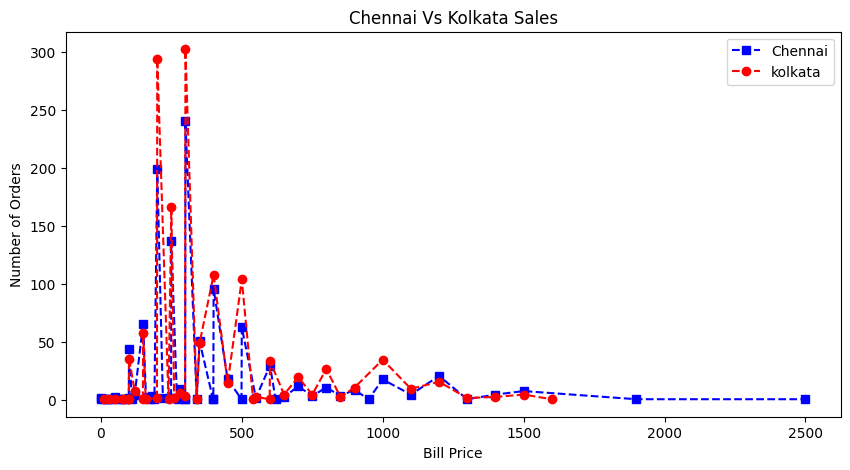

In [125]:
x=f[f['City']=='Chennai'].groupby('Price')['Price'].agg('count')
y=f[f['City']=='Kolkata'].groupby('Price')['Price'].agg('count')
plt.figure(figsize=(10,5))
plt.plot(x,'s--b')
plt.plot(y,'o--r')
plt.xlabel('Bill Price')
plt.ylabel('Number of Orders')
plt.title('Chennai Vs Kolkata Sales')
plt.legend(['Chennai',"kolkata"])
;

''

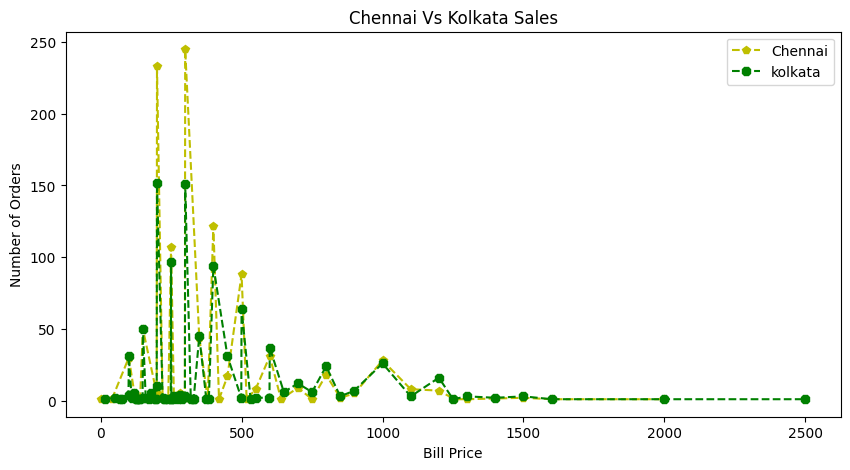

In [140]:
x=f[f['City']=='Pune'].groupby('Price')['Price'].agg('count')
y=f[f['City']=='Bangalore'].groupby('Price')['Price'].agg('count')
plt.figure(figsize=(10,5))
plt.plot(x,'p--y')
plt.plot(y,'8--g')
plt.xlabel('Bill Price')
plt.ylabel('Number of Orders')
plt.title('Chennai Vs Kolkata Sales')
plt.legend(['Chennai',"kolkata"])
;

In [242]:
def average(city):
    ratings_count=dict(f[f['City']==city].groupby('Avg ratings')['Avg ratings'].agg('count'))    
    total=1
    sum=0
    for key, value in ratings_count.items():
        total += (key * value)
        sum+=value
    avg=total/sum
    return avg

''

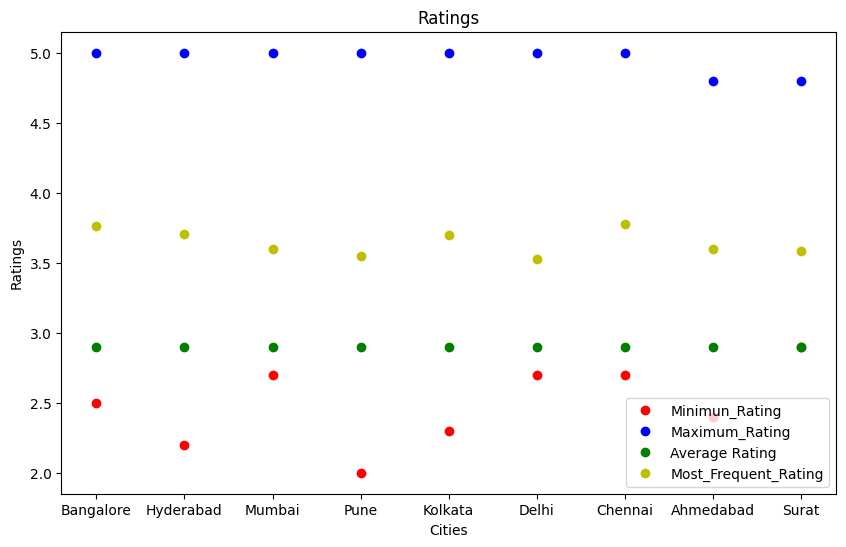

In [243]:
def city_minmax_rating(city):
    d1=f[f['City']==city].groupby('Avg ratings')['Avg ratings'].unique().min()
    d2=f[f['City']==city].groupby('Avg ratings')['Avg ratings'].unique().max()
    d3=f[f['City']==city]['Avg ratings'].mode().iloc[0]
    d4= average(city)
    plt.plot(city,d1,'o',color='r')
    plt.plot(city,d2,'o',color='b')
    plt.plot(city,d3,'o',color='g')
    plt.plot(city,d4,'o',c='y')
plt.figure(figsize=(10,6))
for i in cityname:
    city_minmax_rating(i)
plt.xlabel('Cities')
plt.ylabel('Ratings')
plt.title('Ratings')
plt.legend(['Minimun_Rating','Maximum_Rating','Average Rating','Most_Frequent_Rating'])
;